파이썬 머신러닝 완벽가이드 ch7. 1~2 pg. 431 ~ 449



---



## **군집화**

### K-평균 알고리즘 이해

- K-평균은 군집화에서 가장 일반적으로 사용되는 알고리즘이다. K-평균은 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트를 선택하는 군집화 기법이다.

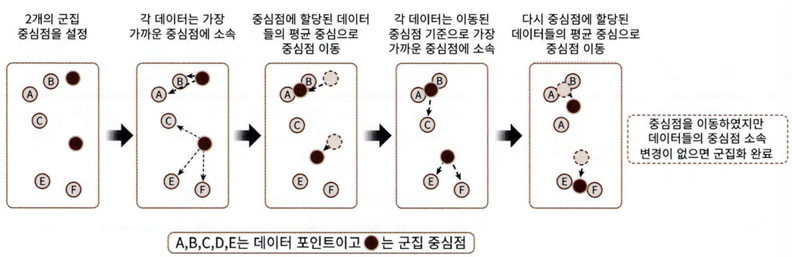

### 사이킷런 KMeans 클래스 소개


In [12]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 예제
kmeans = KMeans(
    n_clusters=8,       # 군집 중심점의 개수
    init='k-means++',   # 임의로 설정하지 않고 이렇게 함
    n_init=10,          # 초기화 시도 횟수
    max_iter=300,       # 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
    tol=0.0001,         # 수렴 기준
    random_state=None,  # 결과 재현성을 위한 난수 시드
    copy_x=True         # 데이터 복사를 수행 (필요하지 않다면 False로 설정 가능)
)

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF) # irisDF 데이터에 대한 군집화 수행결과가 kmeans 객체 변수로 반환됨

KMeans(n_clusters=3, random_state=0)

In [15]:
print(kmeans.labels_) # 각 데이터가 어떤 중심에 속하는지 알 수 있음

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


labels_의 값이 0, 1, 2로 돼 있으며, 이는 각 레코드가 첫번째 군집, 두번째 군집, 세번째 군집에 속함을 의미한다.

In [16]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


분류 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑됐다. Target 1 값 데이터는 3개만 2번 군집으로 그루핑됐고, 나머지 47개는 모두 0번 군집으로 그루핑됐다. 하지만 Target2 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑됨

In [17]:
# 붓꽃 데이터세트의 속성이 4개이므로 PCA를 이용해 4개의 속성을 2개로 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


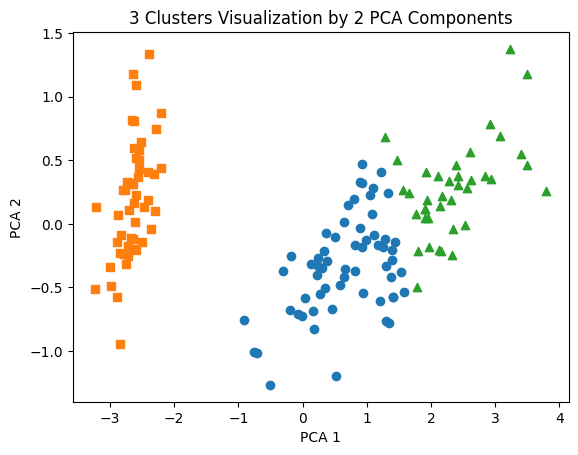

In [18]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


Cluster 1을 나타내는 네모('s')는 명확히 다른 군집과 잘 분리되어있다. Cluster 0을 나타내는 동그라미 ('o')과 Cluster 2를 나타내는 세모('^')는 상당수준 분리돼 있지만, 네모만큼 명확하게는 분리되어있지 않음



---



### Clustering 알고리즘 테스트를 위한 데이터 생성

- 대표적인 군집화용 데이터 생성기:
make_blobs()와 make_classification() API
- 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있음
- 둘의 차이는 개별 군집의 중심점과 표준 편차 제어 기능 추가 ; 노이즈를 포함한 데이터를 만드는 데 유용


make_blobs()의 호출 파라미터
- n_samples: 생성할 총 데이터의 개수
- n_features: 데이터의 피처 개수, 시각화를 목표로 할 경우 2개로 설정해 첫번째는 x, 두번째는 y 상에 표현
- centers: int값, 예를 들어 3으로 설정하면 군집의 개수를 나타냄. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미함
- cluster_std: 생성될 군집 데이터의 표준편차를 의미함. 예를 들어 0.8이면 군집 내 데이터의 표준편차가 0.8인 것이고, [0.8, 1.2, 0.6]과 같은 형태면 3개의 군집에서 첫번째 군집 내 데이터의 표준편차가 0.8, 두번째 군집 내 데이터의 표준편차가 1.2, 군집 내 데이터의 표준편차가 0.6이다.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape) # 총 200개의 레코드와 2개의 피처가 3개의 군집화 분포도를 가진 피처 데이터 세트 X와, 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환됨

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [20]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


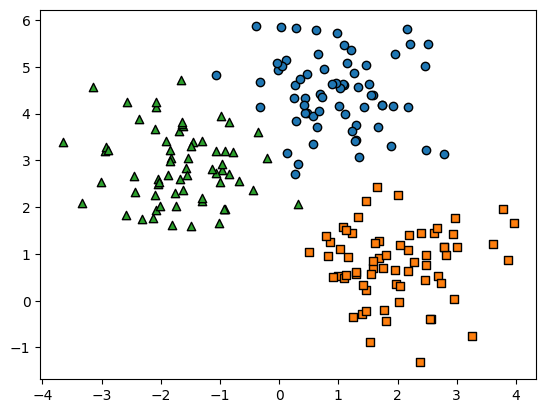

In [21]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

타깃값 0,1,2에 따라 마커를 다르게 해서 산점도를 그려보면 다음과 같이 3개의 구분될 수 있는 군집영역으로 피처 데이터 세트가 만들어졌음을 알 수 있다.

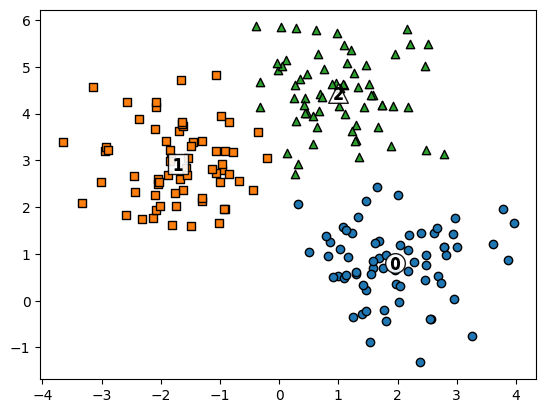

In [22]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()

make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있다.

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


Target 0이 cluster label 0으로, target 1이 label 2로, target 2가 label 1로 거의 대부분 잘 매핑됨



---



### 02 붓꽃(Iris) 데이터 셋을 이용한 군집 평가

대부분의 군집화 데이터 세트는 앞의 붓꽃 데이터와 달리 비교할만한 타깃 레이블을 가지고 있지 않다.
-> 그렇다면 군집화가 효율적으로 잘 됐는지 평가할 수 있는 지표에는 무엇이 있을까? 정확하게는 못하더라도 대표적인 방법으로 **실루엣 분석**을 이용한다.

- 실루엣 분석은 각 군집 간 거리가 얼마나 효울적으로 분리돼 있는지를 나타낸다. (즉 다른 군집과는 떨어져있고 동일 군집끼리는 서로 가깝게 잘 뭉쳐있다)
- 실루엣 분석은 **실루엣 계수**를 기반으로 하는데, 실루엣 계수는 개별 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표임
- 실루엣 계수는 -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다. -값은 아예 다른 군집에 데이터가 할당됐음을 의미함


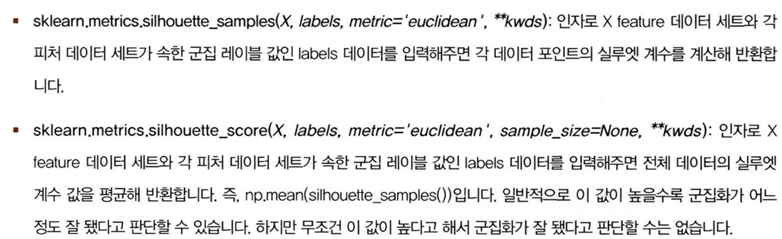

좋은 군집화가 되려면 충족돼야 하는 조건

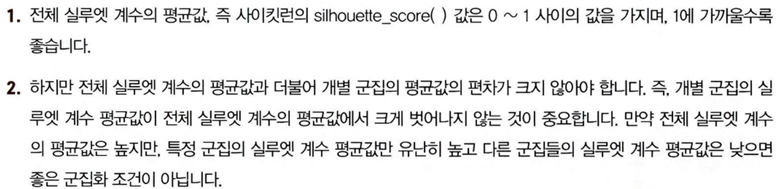

In [23]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [24]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


1번 군집은 실루엣 계쑤 평균 값이 0.79인데 반해, 0번은 0.42, 2번은 0.43으로 상대적으로 평균값이 1번에 비해 낮다

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없다. 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐져 있는 경우에 good임.

In [31]:
# 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때 개별 군집별 평균 실루엣 계수 값을 시각화
## 군집의 개수를 정하는 데 도움을 줌

def visualize_silhouette(cluster_lists, X_features):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

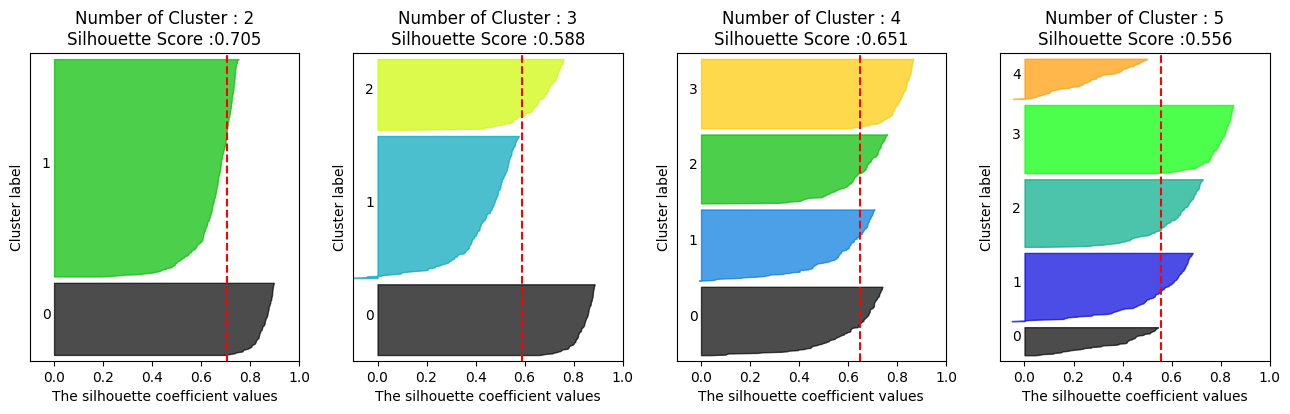

In [32]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

- X축은 실루엣 계수 값이고, Y축은 개별 군집과 이에 속하는 데이터이다. 개별 군집에 속하는 데이터의 수는 Y축의 높이로 추측할 수 있다.
- 점선으로 표시된 선은 전체 데이터의 평균 실루엣 계수 값을 나타낸다.


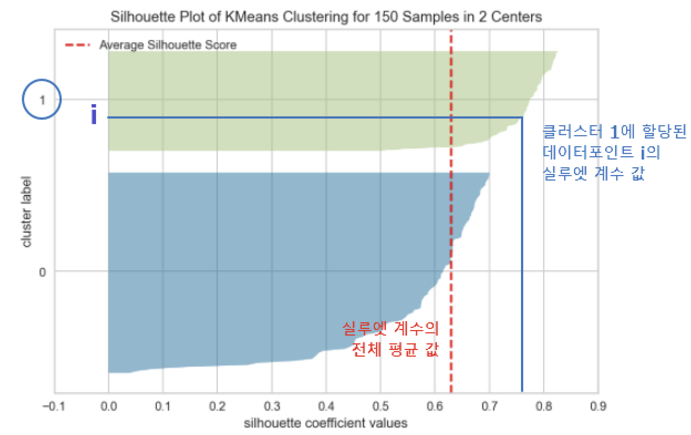

[최적의 군집 개수는?]
- 군집의 개수가 2개일 때 평균 실루엣 계수가 가장 높다. **하지만 4개의 군집일 때 가장 최적이다**. 왜냐하면 군집의 개수가 2개일 때는, 1번 군집은 평균보다 적은 데이터 값이 매우 많다. 실제로 그래프를 그려보면 내부 데이터끼리 많이 떨어져있음을 볼 수 있다. 반면 군집의 개수가 4개일 때는, 1번 군집의 경우 많은 데이터가 평균보다 높은 계수 값을 가지고 있으며 0,2번의 경우 절반에 가까운 데이터가 평균보다 높은 계수 값을 가지고 있으며 3번 경우만 약 1/3 정도가 평균보다 높은 계수 값을 가지고 있다.  

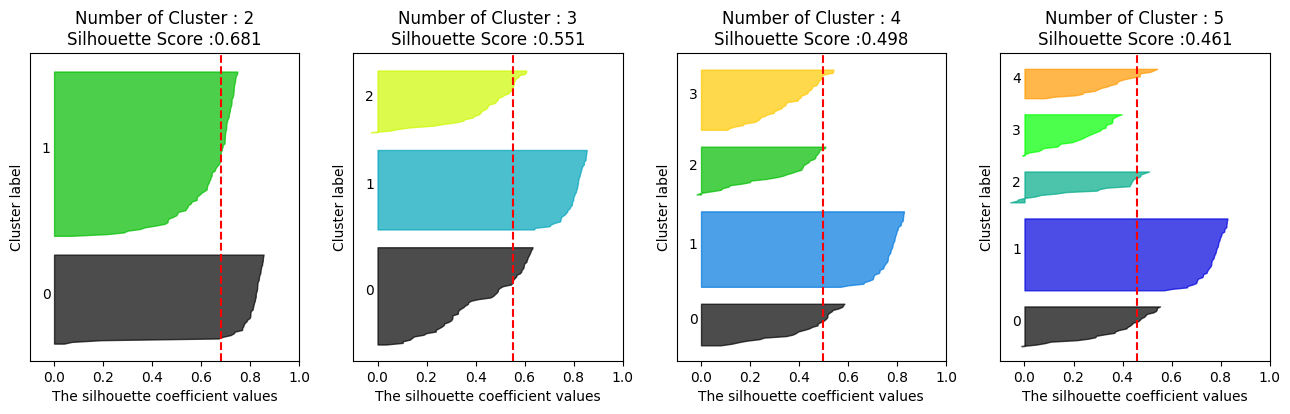

In [33]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

붓꽃 데이터를 K-평균으로 군집화할 경우에는 군집 개수를 2개로 하는 것이 가장 좋아보임.